In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats

In [2]:
teams=pd.read_csv("data/teams.csv")
summary=pd.read_csv("data/games_summary_202021.csv")

In [3]:
teams=teams[teams["Season"]=="2020-21"]
teams=teams[teams["League"]=="B1"]
teams

,TeamId,Season,League,NameShort,NameLong,Division
144,702,2020-21,B1,北海道,レバンガ北海道,東地区
145,693,2020-21,B1,秋田,秋田ノーザンハピネッツ,東地区
146,703,2020-21,B1,宇都宮,宇都宮ブレックス,東地区
147,704,2020-21,B1,千葉,千葉ジェッツ,東地区
148,706,2020-21,B1,A東京,アルバルク東京,東地区
149,726,2020-21,B1,SR渋谷,サンロッカーズ渋谷,東地区
150,727,2020-21,B1,川崎,川崎ブレイブサンダース,東地区
151,694,2020-21,B1,横浜,横浜ビー・コルセアーズ,東地区
152,695,2020-21,B1,新潟,新潟アルビレックスBB,東地区
153,696,2020-21,B1,富山,富山グラウジーズ,東地区


In [4]:
summary=summary.merge(teams,on="TeamId")
summary

,ScheduleKey,TeamId,PTS,Q1,Q2,Q3,Q4,OT1,OT2,OT3,...,PtsSecondChance,PtsFromTurnover,BiggestScoringRun,LeadChanges,TimesTied,Season,League,NameShort,NameLong,Division
0,5938,700,69,21,8,21,19,0,0,0,...,6,21,9-0(56-81),6,3,2020-21,B1,大阪,エヴェッサ大阪,西地区
1,5939,700,77,15,23,16,23,0,0,0,...,13,11,6-0(15-27),2,2,2020-21,B1,大阪,エヴェッサ大阪,西地区
2,5952,700,98,24,20,28,26,0,0,0,...,7,26,9-0(81-58),1,1,2020-21,B1,大阪,エヴェッサ大阪,西地区
3,5912,700,82,27,18,20,17,0,0,0,...,5,4,11-0(13-3),2,0,2020-21,B1,大阪,エヴェッサ大阪,西地区
4,5913,700,78,12,23,22,21,0,0,0,...,14,8,11-0(55-47),0,2,2020-21,B1,大阪,エヴェッサ大阪,西地区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,6332,701,87,24,30,16,17,0,0,0,...,17,9,8-0(48-40),6,6,2020-21,B1,琉球,琉球ゴールデンキングス,西地区
1144,6233,701,85,27,16,19,23,0,0,0,...,7,6,7-0(7-3),3,0,2020-21,B1,琉球,琉球ゴールデンキングス,西地区
1145,6448,701,70,10,18,22,20,0,0,0,...,27,13,10-0(57-57),0,1,2020-21,B1,琉球,琉球ゴールデンキングス,西地区
1146,6449,701,88,13,15,22,25,13,0,0,...,6,16,18-0(62-61),0,1,2020-21,B1,琉球,琉球ゴールデンキングス,西地区


In [5]:
summary=summary.sort_values("ScheduleKey")
summary

,ScheduleKey,TeamId,PTS,Q1,Q2,Q3,Q4,OT1,OT2,OT3,...,PtsSecondChance,PtsFromTurnover,BiggestScoringRun,LeadChanges,TimesTied,Season,League,NameShort,NameLong,Division
1103,5854,701,61,14,11,16,20,0,0,0,...,10,16,5-0(50-37),3,1,2020-21,B1,琉球,琉球ゴールデンキングス,西地区
467,5854,703,73,17,13,24,19,0,0,0,...,8,23,8-0(48-29),3,1,2020-21,B1,宇都宮,宇都宮ブレックス,東地区
466,5855,703,79,20,22,12,25,0,0,0,...,6,9,10-0(37-31),6,3,2020-21,B1,宇都宮,宇都宮ブレックス,東地区
1096,5855,701,68,19,14,16,19,0,0,0,...,10,14,8-0(20-24),6,3,2020-21,B1,琉球,琉球ゴールデンキングス,西地区
63,5856,706,85,16,15,27,27,0,0,0,...,8,14,7-0(42-30),2,2,2020-21,B1,A東京,アルバルク東京,東地区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,6451,700,96,27,17,26,26,0,0,0,...,18,10,11-0(17-10),1,2,2020-21,B1,大阪,エヴェッサ大阪,西地区
569,6452,699,69,11,19,19,20,0,0,0,...,14,10,7-0(6-9),2,4,2020-21,B1,京都,京都ハンナリーズ,西地区
738,6452,720,89,19,23,22,25,0,0,0,...,14,10,15-0(24-11),2,4,2020-21,B1,島根,島根スサノオマジック,西地区
568,6453,699,88,23,25,17,23,0,0,0,...,6,10,7-0(26-23),1,1,2020-21,B1,京都,京都ハンナリーズ,西地区


In [6]:
summary_g=summary[::2]#偶数行を抽出
summary_g

,ScheduleKey,TeamId,PTS,Q1,Q2,Q3,Q4,OT1,OT2,OT3,...,PtsSecondChance,PtsFromTurnover,BiggestScoringRun,LeadChanges,TimesTied,Season,League,NameShort,NameLong,Division
1103,5854,701,61,14,11,16,20,0,0,0,...,10,16,5-0(50-37),3,1,2020-21,B1,琉球,琉球ゴールデンキングス,西地区
466,5855,703,79,20,22,12,25,0,0,0,...,6,9,10-0(37-31),6,3,2020-21,B1,宇都宮,宇都宮ブレックス,東地区
63,5856,706,85,16,15,27,27,0,0,0,...,8,14,7-0(42-30),2,2,2020-21,B1,A東京,アルバルク東京,東地区
922,5857,727,55,7,14,17,17,0,0,0,...,12,10,8-0(13-15),4,0,2020-21,B1,川崎,川崎ブレイブサンダース,東地区
577,5858,728,82,26,15,18,23,0,0,0,...,11,15,8-0(13-24),1,0,2020-21,B1,三河,シーホース三河,西地区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,6449,729,93,18,21,23,13,18,0,0,...,2,12,7-0(9-2),0,1,2020-21,B1,名古屋D,名古屋ダイヤモンドドルフィンズ,西地区
857,6450,698,84,18,24,20,22,0,0,0,...,20,16,10-0(21-35),4,4,2020-21,B1,滋賀,滋賀レイクスターズ,西地区
858,6451,698,80,16,21,19,24,0,0,0,...,11,10,5-0(27-21),1,2,2020-21,B1,滋賀,滋賀レイクスターズ,西地区
569,6452,699,69,11,19,19,20,0,0,0,...,14,10,7-0(6-9),2,4,2020-21,B1,京都,京都ハンナリーズ,西地区


In [7]:
summary_k=summary[1::2]
summary_k

,ScheduleKey,TeamId,PTS,Q1,Q2,Q3,Q4,OT1,OT2,OT3,...,PtsSecondChance,PtsFromTurnover,BiggestScoringRun,LeadChanges,TimesTied,Season,League,NameShort,NameLong,Division
467,5854,703,73,17,13,24,19,0,0,0,...,8,23,8-0(48-29),3,1,2020-21,B1,宇都宮,宇都宮ブレックス,東地区
1096,5855,701,68,19,14,16,19,0,0,0,...,10,14,8-0(20-24),6,3,2020-21,B1,琉球,琉球ゴールデンキングス,西地区
923,5856,727,79,16,6,22,35,0,0,0,...,12,13,7-0(58-51),2,2,2020-21,B1,川崎,川崎ブレイブサンダース,東地区
62,5857,706,52,8,14,13,17,0,0,0,...,10,11,7-0(13-7),4,0,2020-21,B1,A東京,アルバルク東京,東地区
341,5858,726,78,18,27,12,21,0,0,0,...,19,15,10-0(28-28),1,0,2020-21,B1,SR渋谷,サンロッカーズ渋谷,東地区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,6449,701,88,13,15,22,25,13,0,0,...,6,16,18-0(62-61),0,1,2020-21,B1,琉球,琉球ゴールデンキングス,西地区
52,6450,700,68,19,9,27,13,0,0,0,...,7,4,7-0(11-7),4,4,2020-21,B1,大阪,エヴェッサ大阪,西地区
53,6451,700,96,27,17,26,26,0,0,0,...,18,10,11-0(17-10),1,2,2020-21,B1,大阪,エヴェッサ大阪,西地区
738,6452,720,89,19,23,22,25,0,0,0,...,14,10,15-0(24-11),2,4,2020-21,B1,島根,島根スサノオマジック,西地区


In [8]:
summary=summary.reset_index()

In [9]:
win=[]
for g,k in zip(summary_g["PTS"],summary_k["PTS"]):
    if g<k:
        win.append(0)
        win.append(1)
    elif g>k:
        win.append(1)
        win.append(0)
        
summary["win"]=pd.DataFrame(win)

In [10]:
summary

,index,ScheduleKey,TeamId,PTS,Q1,Q2,Q3,Q4,OT1,OT2,...,PtsFromTurnover,BiggestScoringRun,LeadChanges,TimesTied,Season,League,NameShort,NameLong,Division,win
0,1103,5854,701,61,14,11,16,20,0,0,...,16,5-0(50-37),3,1,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,0
1,467,5854,703,73,17,13,24,19,0,0,...,23,8-0(48-29),3,1,2020-21,B1,宇都宮,宇都宮ブレックス,東地区,1
2,466,5855,703,79,20,22,12,25,0,0,...,9,10-0(37-31),6,3,2020-21,B1,宇都宮,宇都宮ブレックス,東地区,1
3,1096,5855,701,68,19,14,16,19,0,0,...,14,8-0(20-24),6,3,2020-21,B1,琉球,琉球ゴールデンキングス,西地区,0
4,63,5856,706,85,16,15,27,27,0,0,...,14,7-0(42-30),2,2,2020-21,B1,A東京,アルバルク東京,東地区,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,53,6451,700,96,27,17,26,26,0,0,...,10,11-0(17-10),1,2,2020-21,B1,大阪,エヴェッサ大阪,西地区,1
1144,569,6452,699,69,11,19,19,20,0,0,...,10,7-0(6-9),2,4,2020-21,B1,京都,京都ハンナリーズ,西地区,0
1145,738,6452,720,89,19,23,22,25,0,0,...,10,15-0(24-11),2,4,2020-21,B1,島根,島根スサノオマジック,西地区,1
1146,568,6453,699,88,23,25,17,23,0,0,...,10,7-0(26-23),1,1,2020-21,B1,京都,京都ハンナリーズ,西地区,0


In [11]:
IsWin=summary.loc[:,["ScheduleKey","TeamId","NameShort","PTS","win"]]
IsWin

,ScheduleKey,TeamId,NameShort,PTS,win
0,5854,701,琉球,61,0
1,5854,703,宇都宮,73,1
2,5855,703,宇都宮,79,1
3,5855,701,琉球,68,0
4,5856,706,A東京,85,1
...,...,...,...,...,...
1143,6451,700,大阪,96,1
1144,6452,699,京都,69,0
1145,6452,720,島根,89,1
1146,6453,699,京都,88,0


In [12]:
games=pd.read_csv("data/games_202021.csv")
games

,ScheduleKey,Season,EventId,Date,Arena,Attendance,HomeTeamId,AwayTeamId
0,5938,2020-21,2,2020.10.24,おおきにアリーナ舞洲,1675.0,700,706
1,5939,2020-21,2,2020.10.25,おおきにアリーナ舞洲,1255.0,700,706
2,5890,2020-21,2,2020.10.09,広島サンプラザホール,2061.0,721,706
3,5903,2020-21,2,2020.10.18,横浜国際プール,1517.0,694,706
4,5891,2020-21,2,2020.10.10,広島サンプラザホール,2221.0,721,706
...,...,...,...,...,...,...,...,...
1032,6848,2020-21,7,2021.04.28,太田市運動公園市民体育館,1250.0,713,708
1033,6855,2020-21,7,2021.04.14,山形県総合運動公園,257.0,710,708
1034,6926,2020-21,7,2021.04.24,名古屋市枇杷島スポーツセンター,684.0,717,722
1035,6927,2020-21,7,2021.04.25,名古屋市枇杷島スポーツセンター,866.0,717,722


In [13]:
IsWin=IsWin.merge(games,on="ScheduleKey")
IsWin

,ScheduleKey,TeamId,NameShort,PTS,win,Season,EventId,Date,Arena,Attendance,HomeTeamId,AwayTeamId
0,5854,701,琉球,61,0,2020-21,2,2020.10.03,ブレックスアリーナ宇都宮,2114.0,703,701
1,5854,703,宇都宮,73,1,2020-21,2,2020.10.03,ブレックスアリーナ宇都宮,2114.0,703,701
2,5855,703,宇都宮,79,1,2020-21,2,2020.10.04,ブレックスアリーナ宇都宮,2073.0,703,701
3,5855,701,琉球,68,0,2020-21,2,2020.10.04,ブレックスアリーナ宇都宮,2073.0,703,701
4,5856,706,A東京,85,1,2020-21,2,2020.10.02,アリーナ立川立飛,1311.0,706,727
...,...,...,...,...,...,...,...,...,...,...,...,...
1143,6451,700,大阪,96,1,2020-21,2,2021.05.02,おおきにアリーナ舞洲,NaN,700,698
1144,6452,699,京都,69,0,2020-21,2,2021.05.01,松江市総合体育館,1549.0,720,699
1145,6452,720,島根,89,1,2020-21,2,2021.05.01,松江市総合体育館,1549.0,720,699
1146,6453,699,京都,88,0,2020-21,2,2021.05.02,松江市総合体育館,1669.0,720,699


In [14]:
is_home=[]
for teamid,home in zip(IsWin["TeamId"],IsWin["HomeTeamId"]):
    if teamid==home:
        is_home.append(1)
    else:
        is_home.append(0)
        
IsWin["home"]=pd.DataFrame(is_home)

In [15]:
IsWin

,ScheduleKey,TeamId,NameShort,PTS,win,Season,EventId,Date,Arena,Attendance,HomeTeamId,AwayTeamId,home
0,5854,701,琉球,61,0,2020-21,2,2020.10.03,ブレックスアリーナ宇都宮,2114.0,703,701,0
1,5854,703,宇都宮,73,1,2020-21,2,2020.10.03,ブレックスアリーナ宇都宮,2114.0,703,701,1
2,5855,703,宇都宮,79,1,2020-21,2,2020.10.04,ブレックスアリーナ宇都宮,2073.0,703,701,1
3,5855,701,琉球,68,0,2020-21,2,2020.10.04,ブレックスアリーナ宇都宮,2073.0,703,701,0
4,5856,706,A東京,85,1,2020-21,2,2020.10.02,アリーナ立川立飛,1311.0,706,727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,6451,700,大阪,96,1,2020-21,2,2021.05.02,おおきにアリーナ舞洲,NaN,700,698,1
1144,6452,699,京都,69,0,2020-21,2,2021.05.01,松江市総合体育館,1549.0,720,699,0
1145,6452,720,島根,89,1,2020-21,2,2021.05.01,松江市総合体育館,1549.0,720,699,1
1146,6453,699,京都,88,0,2020-21,2,2021.05.02,松江市総合体育館,1669.0,720,699,0


In [16]:
data=IsWin.loc[:,["NameShort","win","home"]]
data

,NameShort,win,home
0,琉球,0,0
1,宇都宮,1,1
2,宇都宮,1,1
3,琉球,0,0
4,A東京,1,1
...,...,...,...
1143,大阪,1,1
1144,京都,0,0
1145,島根,1,1
1146,京都,0,0


In [17]:
model=smf.glm(formula="win~home",data=data,family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    win   No. Observations:                 1148
Model:                            GLM   Df Residuals:                     1146
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -795.73
Date:                Fri, 17 Sep 2021   Deviance:                       1591.5
Time:                        10:10:27   Pearson chi2:                 1.15e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0070      0.083     -0.083      0.933      -0.171       0.157
home           0.0139      0.118      0.118      0.906      -0.217       0.245
==============================================================================
"""

In [18]:
data2=IsWin.loc[:,["NameShort","PTS","home"]]
data2

,NameShort,PTS,home
0,琉球,61,0
1,宇都宮,73,1
2,宇都宮,79,1
3,琉球,68,0
4,A東京,85,1
...,...,...,...
1143,大阪,96,1
1144,京都,69,0
1145,島根,89,1
1146,京都,88,0


In [19]:
x=data2["home"]
X=sm.add_constant(x)
model2=sm.OLS(data2["PTS"],X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07034
Date:                Fri, 17 Sep 2021   Prob (F-statistic):              0.791
Time:                        10:10:28   Log-Likelihood:                -4492.9
No. Observations:                1148   AIC:                             8990.
Df Residuals:                    1146   BIC:                             9000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2143      0.506    158.440      0.000      79.221      81.208
home           0.1899      0.716      0.265      0.791      -1.215       1.595
==============================================================================
Omnibus:                       12.928   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.813
Skew:                           0.185   Prob(JB):                     0.000607
Kurtosis:                       3.415   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#IsWin.to_csv("IsWin.csv",encoding="utf-8",index=False)

In [21]:
data

,NameShort,win,home
0,琉球,0,0
1,宇都宮,1,1
2,宇都宮,1,1
3,琉球,0,0
4,A東京,1,1
...,...,...,...
1143,大阪,1,1
1144,京都,0,0
1145,島根,1,1
1146,京都,0,0


In [22]:
team_names=data["NameShort"].unique()
team_names

array(['琉球', '宇都宮', 'A東京', '川崎', '三河', 'SR渋谷', '横浜', '新潟', '秋田', '信州',
       '三遠', '千葉', '北海道', '名古屋D', '滋賀', '島根', '京都', '富山', '大阪', '広島'],
      dtype=object)

In [23]:
dataset=[]
for team_name in team_names:
    home_win=0
    away_win=0
    home_games=0
    games=0
    for name,w,h in zip(data["NameShort"],data["win"],data["home"]):
        if name==team_name:
            if w==1 and h==1:
                home_win=home_win+1
            if w==1 and h==0:
                away_win=away_win+1
            if h==1:
                home_games=home_games+1
            games=games+1
    dataset.append([team_name,home_win,away_win,home_games,games])           

In [24]:
dataset

[['琉球', 19, 21, 26, 56],
 ['宇都宮', 25, 24, 30, 60],
 ['A東京', 17, 15, 29, 56],
 ['川崎', 22, 21, 30, 59],
 ['三河', 16, 18, 29, 55],
 ['SR渋谷', 22, 16, 30, 60],
 ['横浜', 10, 9, 30, 59],
 ['新潟', 9, 7, 27, 54],
 ['秋田', 16, 12, 29, 59],
 ['信州', 12, 8, 26, 54],
 ['三遠', 7, 5, 30, 59],
 ['千葉', 23, 20, 28, 57],
 ['北海道', 7, 7, 29, 59],
 ['名古屋D', 15, 17, 26, 56],
 ['滋賀', 7, 16, 30, 59],
 ['島根', 11, 17, 30, 60],
 ['京都', 9, 12, 28, 57],
 ['富山', 19, 20, 30, 60],
 ['大阪', 17, 17, 28, 54],
 ['広島', 5, 4, 29, 55]]

In [25]:
df=pd.DataFrame(dataset,columns=["TeamName","home_win","away_win","home_games","games"])
df

,TeamName,home_win,away_win,home_games,games
0,琉球,19,21,26,56
1,宇都宮,25,24,30,60
2,A東京,17,15,29,56
3,川崎,22,21,30,59
4,三河,16,18,29,55
5,SR渋谷,22,16,30,60
6,横浜,10,9,30,59
7,新潟,9,7,27,54
8,秋田,16,12,29,59
9,信州,12,8,26,54


In [26]:
df["away_games"]=df.loc[:,"games"]-df.loc[:,"home_games"]
df

,TeamName,home_win,away_win,home_games,games,away_games
0,琉球,19,21,26,56,30
1,宇都宮,25,24,30,60,30
2,A東京,17,15,29,56,27
3,川崎,22,21,30,59,29
4,三河,16,18,29,55,26
5,SR渋谷,22,16,30,60,30
6,横浜,10,9,30,59,29
7,新潟,9,7,27,54,27
8,秋田,16,12,29,59,30
9,信州,12,8,26,54,28


In [27]:
df["win%_home"]=df.loc[:,"home_win"]/df.loc[:,"home_games"]
df["win%_away"]=df.loc[:,"away_win"]/df.loc[:,"away_games"]
df

,TeamName,home_win,away_win,home_games,games,away_games,win%_home,win%_away
0,琉球,19,21,26,56,30,0.730769,0.700000
1,宇都宮,25,24,30,60,30,0.833333,0.800000
2,A東京,17,15,29,56,27,0.586207,0.555556
3,川崎,22,21,30,59,29,0.733333,0.724138
4,三河,16,18,29,55,26,0.551724,0.692308
5,SR渋谷,22,16,30,60,30,0.733333,0.533333
6,横浜,10,9,30,59,29,0.333333,0.310345
7,新潟,9,7,27,54,27,0.333333,0.259259
8,秋田,16,12,29,59,30,0.551724,0.400000
9,信州,12,8,26,54,28,0.461538,0.285714


In [28]:
df.describe()

,home_win,away_win,home_games,games,away_games,win%_home,win%_away
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,14.400000,14.300000,28.700000,57.400000,28.70000,0.502801,0.496463
std,6.116414,5.930297,1.454575,2.233713,1.49032,0.211198,0.202051
min,5.000000,4.000000,26.000000,54.000000,26.00000,0.172414,0.153846
25%,9.000000,8.750000,28.000000,55.750000,27.75000,0.330357,0.304187
50%,15.500000,16.000000,29.000000,58.000000,29.00000,0.551724,0.553640
75%,19.000000,18.500000,30.000000,59.000000,30.00000,0.657692,0.672414
max,25.000000,24.000000,30.000000,60.000000,30.00000,0.833333,0.800000


In [29]:
stats.ttest_rel(df["win%_home"],df["win%_away"])

Ttest_relResult(statistic=0.22676993012270524, pvalue=0.8230246124136104)

In [30]:
stats.ttest_ind(df["win%_home"],df["win%_away"])

Ttest_indResult(statistic=0.09696636236947224, pvalue=0.9232627358940954)

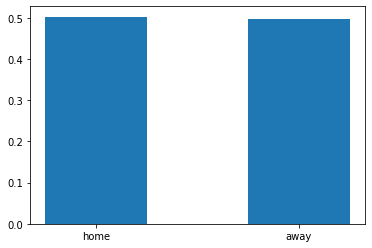

In [53]:
fig, ax=plt.subplots()
y=[df["win%_home"].mean(),df["win%_away"].mean()]
x=[1,2]
labels=["home","away"]
ax.bar(x,y,tick_label=labels,width=0.5)
plt.show()